# Predicting Chikun Gunya in Kerala using Support Vector Regressor

In [1]:
#Importing the necessary packages
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing as pre
from sklearn.metrics import mean_absolute_error

%matplotlib inline

# Reading The datafile containing the  case count along with along other weather features

In [2]:
pwd = os.getcwd()
filepath = os.path.join(pwd,r"DATA/cg.csv")
filepath

'/Users/nalinrajendran/Desktop/STUDY/MIS  SIP PAPER/CHECKPOINTS/CHECK POINT 2/NOTEBOOKS/Chikun Gunya/DATA/cg.csv'

In [3]:
df = pd.read_csv(filepath)
df
# In the months columns we have assigned numbers from 1 to 12 respectively for the months from January To December 
#The table includes precipitation,humidity,temperature parameters

,state,year,month,cases,mean_temp,relative_hum,prec,prec_sum,humi_spe,temp_max,temp_min,temp_avg,dew_point
0,Kerala,2011,1,7,23.47,72.81,0.04,0.00,13.18,32.30,16.42,24.360,17.61
1,Kerala,2011,2,2,24.90,65.56,1.58,47.46,12.63,33.97,16.10,25.035,16.65
2,Kerala,2011,3,5,27.33,61.00,0.44,10.55,13.37,36.56,18.12,27.340,17.42
3,Kerala,2011,4,13,27.20,72.94,4.01,105.47,16.42,36.91,22.50,29.705,21.04
4,Kerala,2011,5,4,26.72,79.38,4.33,121.29,17.70,34.47,22.46,28.465,22.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,Kerala,2021,8,35,24.03,90.50,8.42,261.11,17.52,28.51,20.41,24.460,22.26
128,Kerala,2021,9,18,24.33,90.50,7.28,218.52,17.82,29.17,21.54,25.355,22.57
129,Kerala,2021,10,12,24.67,90.38,13.33,413.24,18.19,28.85,22.11,25.480,22.90
130,Kerala,2021,11,10,24.08,90.06,10.07,302.14,17.52,28.38,20.90,24.640,22.27


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state         132 non-null    object 
 1   year          132 non-null    int64  
 2   month         132 non-null    int64  
 3   cases         132 non-null    int64  
 4   mean_temp     132 non-null    float64
 5   relative_hum  132 non-null    float64
 6   prec          132 non-null    float64
 7   prec_sum      132 non-null    float64
 8   humi_spe      132 non-null    float64
 9   temp_max      132 non-null    float64
 10  temp_min      132 non-null    float64
 11  temp_avg      132 non-null    float64
 12  dew_point     132 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 13.5+ KB


In [5]:
df.describe()

,year,month,cases,mean_temp,relative_hum,prec,prec_sum,humi_spe,temp_max,temp_min,temp_avg,dew_point
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,2016.000000,6.500000,16.348485,25.412121,78.569167,5.213333,154.496136,16.093864,32.165909,20.096591,26.131250,20.631667
std,3.174324,3.465203,20.814699,1.631589,12.025662,4.915950,151.150037,2.167127,3.613296,2.139324,2.158619,2.474223
min,2011.000000,1.000000,0.000000,23.300000,52.000000,0.000000,0.000000,10.800000,26.720000,14.700000,22.620000,13.730000
25%,2013.000000,3.750000,3.000000,24.205000,66.892500,1.030000,26.370000,14.437500,29.120000,18.202500,24.625000,18.960000
50%,2016.000000,6.500000,7.500000,24.700000,82.625000,3.950000,113.380000,17.030000,30.605000,20.640000,25.350000,21.800000
75%,2019.000000,9.250000,22.000000,26.505000,89.297500,8.315000,250.390000,17.820000,35.555000,21.557500,27.592500,22.532500
max,2021.000000,12.000000,105.000000,29.550000,92.500000,21.370000,638.090000,18.800000,39.170000,24.310000,31.430000,23.400000


<AxesSubplot:xlabel='year'>

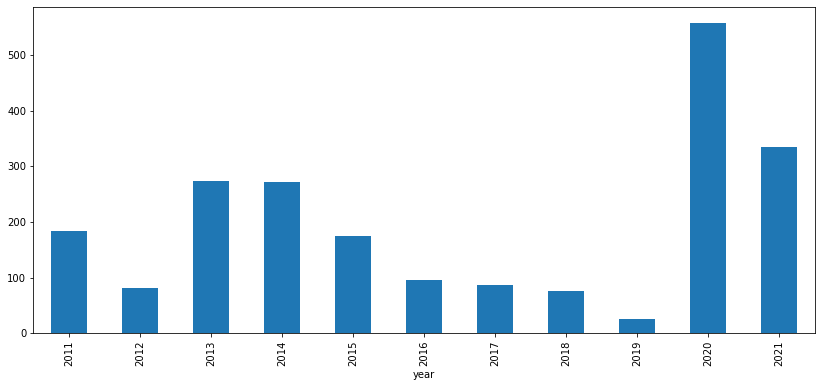

In [6]:
plt.figure(figsize = (14,6))
df.groupby('year')['cases'].sum().plot.bar()

# The above bar graph indicates the yearwise count of Malaria cases from 2011 to 2021

Text(0.5, 1.0, 'Dengue Cases by Year ')

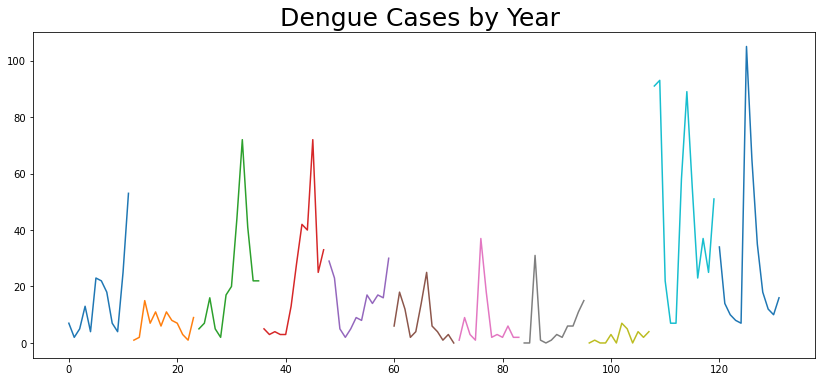

In [7]:
plt.figure(figsize = (14,6))
df.groupby('year')['cases'].plot()
plt.title('Dengue Cases by Year ', fontsize = 25)

Text(0.5, 1.0, 'Rainfall by Year ')

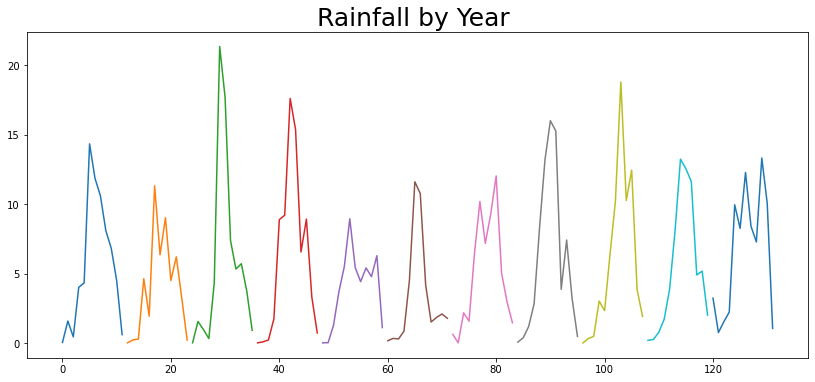

In [8]:
plt.figure(figsize = (14,6))
df.groupby('year')['prec'].plot()
plt.title('Rainfall by Year ', fontsize = 25)

# The above graph reflects the rainfall pattern over the period 2011-2021

# Declaring the input correlating features and output lables.

In [9]:
X = df.drop("cases", axis=1)
X = df.drop("state", axis=1)
#output feature we are selecting here is the case count
y = df["cases"]

# Splitting the data for Train and Test

In [10]:
#Taking the train and test data. We are using 80 percent of the data for training and 20 percent for testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)



In [11]:
X_train.drop("cases", axis=1).reset_index(drop=True)
X_test.drop("cases", axis=1).head().reset_index(drop=True)

,year,month,mean_temp,relative_hum,prec,prec_sum,humi_spe,temp_max,temp_min,temp_avg,dew_point
0,2018,7,24.14,92.00,16.02,506.25,17.94,28.11,20.73,24.420,22.68
1,2011,5,26.72,79.38,4.33,121.29,17.70,34.47,22.46,28.465,22.43
2,2021,9,24.33,90.50,7.28,218.52,17.82,29.17,21.54,25.355,22.57
3,2016,3,29.20,60.56,0.29,5.27,15.01,38.31,22.39,30.350,19.48
4,2016,6,24.87,88.75,11.62,337.50,18.07,29.20,20.98,25.090,22.76


In [12]:
y_train

39      3
89      1
97      1
104     0
16     11
       ..
24      5
107     4
61     18
119    51
95     15
Name: cases, Length: 92, dtype: int64

In [13]:
#Here, we have used the Linear kerel and with little hyper parameter tuning.
model = SVR(kernel='linear',C=80,gamma=.009)


#Making the model fit on the features and lables.
model.fit(X_train, y_train)

accuracy = model.score(X_test, y_test)

print("Test accuracy: {:.2f}".format(accuracy))


Test accuracy: 1.00


# Prediction and Comparision of the predicted values and actual values


In [14]:
y_pred = model.predict(X_test)

df1 = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

df1


,Actual,Predicted
90,3,3.078587
4,4,4.041020
128,18,18.077859
62,12,12.061786
65,14,14.053145
41,13,13.053113
21,3,3.048908
106,2,2.107022
122,10,10.094854
92,6,6.085710


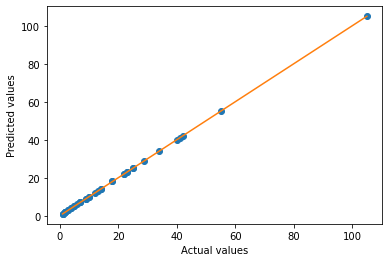

In [15]:
# Plot the actual versus predicted values
plt.plot(y_test, y_pred, "o")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

<AxesSubplot:xlabel='cases', ylabel='prec'>

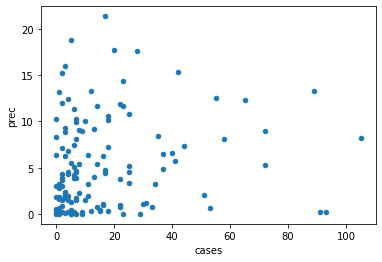

In [16]:
df.plot(x="cases", y="prec", kind="scatter")

# Evaluation metric- Mean Absolute Error

In [17]:
#MAE of the model.

mean_absolute_error(y_test, y_pred)

0.06011383528578897

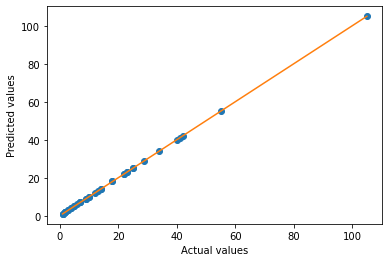

In [18]:
# Plot the actual versus predicted values
plt.plot(y_test, y_pred, "o")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()